# Model training and evaluation

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
import graphviz

# multiclass classifiers
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

In [2]:
# df = pd.read_csv('data/static_02_no_categorical.csv', index_col=0)
# df = pd.read_csv('data/dynamic_01.csv', index_col=0)
df = pd.read_csv('data/dynamic_02_static_no_categorical.csv', index_col=0)

In [3]:
df = df[(df['ratio_running_duration'] >= 0) & (df['ratio_running_duration'] <= 5)]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2021 entries, 32 to 30684
Data columns (total 43 columns):
average_pledge                           2021 non-null float64
backers_count                            2021 non-null int64
days_remaining                           2021 non-null int64
days_running                             2021 non-null int64
pledged                                  2021 non-null float64
ratio_pledged_goal                       2021 non-null float64
ratio_running_duration                   2021 non-null float64
usd_pledged                              2021 non-null float64
faq_count_while_scraping                 2021 non-null float64
comments_count_creator_while_scraping    2021 non-null float64
comments_count_public_while_scraping     2021 non-null float64
updates_count_while_scraping             2021 non-null float64
updates_likes_sum_while_scraping         2021 non-null float64
updates_likes_mean_while_scraping        2021 non-null float64
updates_likes_m

In [5]:
df.sample(5)

,average_pledge,backers_count,days_remaining,days_running,pledged,ratio_pledged_goal,ratio_running_duration,usd_pledged,faq_count_while_scraping,comments_count_creator_while_scraping,...,launch_month,launch_day,launch_dayofweek,launch_hour,image_count,video_kickstarter_count,video_youtube_count,video_count,audio_count,other_embeded_count
23470,0.000000,0,29,1,0.0,0.000,3.333333,0.000000,0.0,0.0,...,3,14,1,4,1,0,0,0,0,0
29975,24.088549,1,16,0,30.0,3.000,0.000000,24.088549,8.0,0.0,...,9,15,4,1,16,0,0,0,0,0
12709,25.000000,1,30,0,25.0,0.500,0.000000,25.000000,0.0,0.0,...,7,14,3,2,0,0,0,0,0,0
13266,100.689189,74,29,1,7451.0,14.902,3.333333,7451.000000,3.0,0.0,...,7,13,2,23,26,0,0,0,0,0
23415,0.000000,0,14,0,0.0,0.000,0.000000,0.000000,0.0,0.0,...,3,15,2,22,2,0,0,0,0,0


In [6]:
# split to train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.30, random_state=16)

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1414 entries, 20274 to 10825
Data columns (total 42 columns):
average_pledge                           1414 non-null float64
backers_count                            1414 non-null int64
days_remaining                           1414 non-null int64
days_running                             1414 non-null int64
pledged                                  1414 non-null float64
ratio_pledged_goal                       1414 non-null float64
ratio_running_duration                   1414 non-null float64
usd_pledged                              1414 non-null float64
faq_count_while_scraping                 1414 non-null float64
comments_count_creator_while_scraping    1414 non-null float64
comments_count_public_while_scraping     1414 non-null float64
updates_count_while_scraping             1414 non-null float64
updates_likes_sum_while_scraping         1414 non-null float64
updates_likes_mean_while_scraping        1414 non-null float64
updates_like

In [8]:
X_train.head()

,average_pledge,backers_count,days_remaining,days_running,pledged,ratio_pledged_goal,ratio_running_duration,usd_pledged,faq_count_while_scraping,comments_count_creator_while_scraping,...,launch_month,launch_day,launch_dayofweek,launch_hour,image_count,video_kickstarter_count,video_youtube_count,video_count,audio_count,other_embeded_count
20274,0.000000,0,28,1,0.0,0.000000,3.448276,0.0,0.0,0.0,...,1,14,5,16,0,0,0,0,0,0
20360,14.500000,4,28,1,58.0,0.145000,3.448276,58.0,4.0,0.0,...,1,14,5,16,0,0,0,0,0,0
21128,0.000000,0,29,0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,2,15,2,17,4,0,0,0,0,0
18460,15.666667,3,29,1,47.0,1.342857,3.333333,47.0,0.0,0.0,...,12,14,2,4,0,0,0,0,0,0
19739,0.000000,0,46,1,0.0,0.000000,2.127660,0.0,0.0,0.0,...,12,14,2,16,0,0,0,0,0,0


## 1. LinearSVC

In [9]:
cls = LinearSVC()
cls = cls.fit(X_train, y_train)

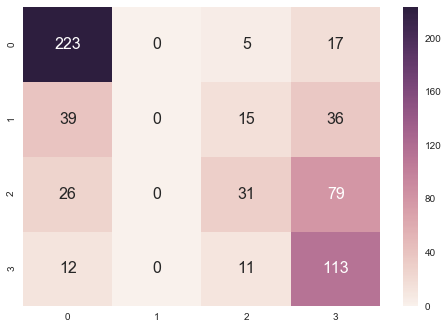

In [10]:
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})

In [11]:
cls.score(X_train, y_train)

0.59830268741159831

In [12]:
cls.score(X_test, y_test)

0.60461285008237231

## 2. DecisionTreeClassifier

In [13]:
cls = DecisionTreeClassifier(random_state=42, max_depth=6) # , class_weight={1: 1, 2:3.239, 3:1.836, 4:1.874}

In [14]:
cls = cls.fit(X_train, y_train)

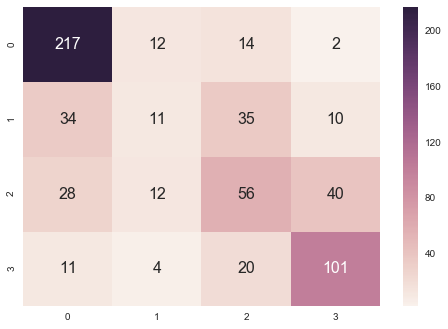

In [15]:
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})

In [16]:
cls.score(X_train, y_train)

0.75318246110325315

In [17]:
cls.score(X_test, y_test)

0.63426688632619443

In [18]:
dot_data = tree.export_graphviz(cls, out_file=None, feature_names=X_train.columns, class_names=['1','2','3','4'],filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render("kickstarter3")

'kickstarter3.pdf'

## 3. RandomForestClassifier

In [19]:
cls = RandomForestClassifier(random_state=42)

In [20]:
cls = cls.fit(X_train, y_train)

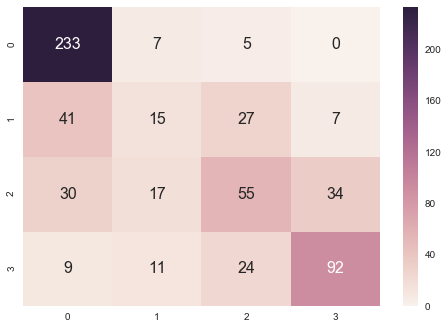

In [21]:
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})

In [22]:
cls.score(X_train, y_train)

0.99222065063649223

In [23]:
cls.score(X_test, y_test)

0.65074135090609553

## 4. KNeighborClassifier

In [24]:
cls = KNeighborsClassifier()

In [25]:
cls = cls.fit(X_train, y_train)

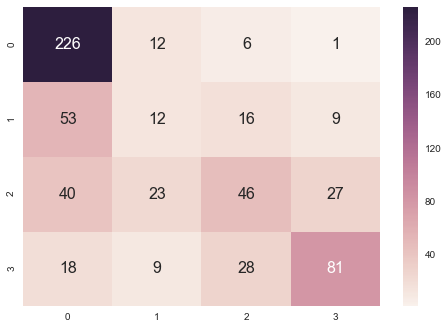

In [26]:
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})

In [27]:
cls.score(X_train, y_train)

0.7142857142857143

In [28]:
cls.score(X_test, y_test)

0.60131795716639214

## 5. NearestCentroid

In [29]:
cls = NearestCentroid()

In [30]:
cls = cls.fit(X_train, y_train)

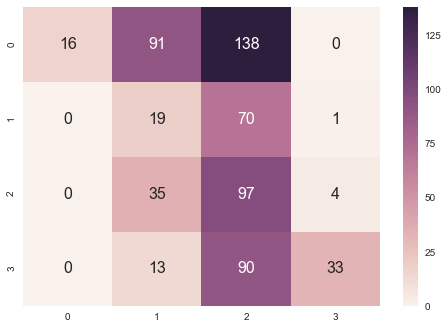

In [31]:
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})

In [32]:
cls.score(X_train, y_train)

0.27086280056577089

In [33]:
cls.score(X_test, y_test)

0.27182866556836904

## 6. LogisticRegression

In [34]:
cls = LogisticRegression(multi_class='multinomial', solver='newton-cg', random_state=42)

In [35]:
cls = cls.fit(X_train, y_train)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


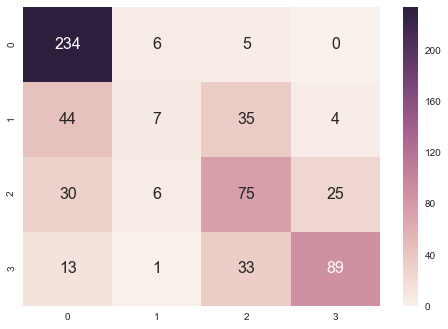

In [36]:
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})

In [37]:
cls.score(X_train, y_train)

0.6973125884016973

In [38]:
cls.score(X_test, y_test)

0.66721581548599673

## 7. RidgeClassifier

In [39]:
cls = RidgeClassifier(random_state=42)

In [40]:
cls = cls.fit(X_train, y_train)

C:\Users\Patrik\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.1628533461671905e-17 / 1.1102230246251565e-16
  RuntimeWarning)


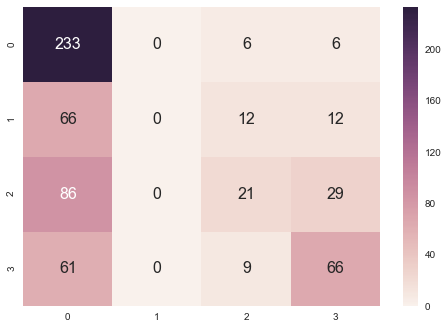

In [41]:
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})

In [42]:
cls.score(X_train, y_train)

0.5643564356435643

In [43]:
cls.score(X_test, y_test)

0.52718286655683688